In [1]:
# we're in the endgame now

from controller import *
%matplotlib inline

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Starting at timestep 1


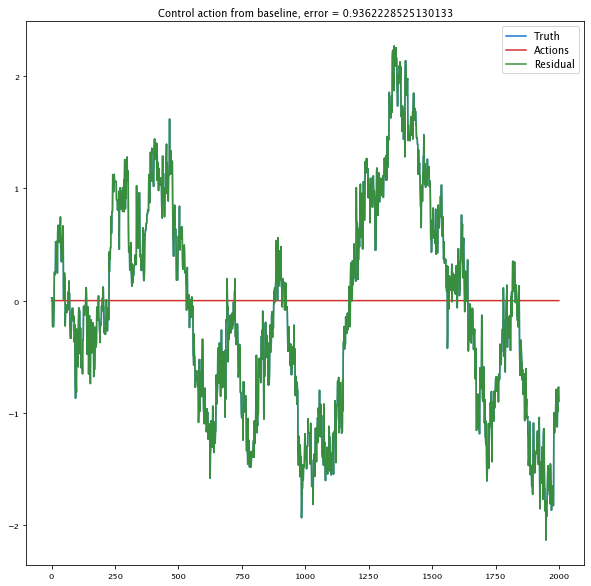

In [2]:
show_control('baseline')

Starting at timestep 3


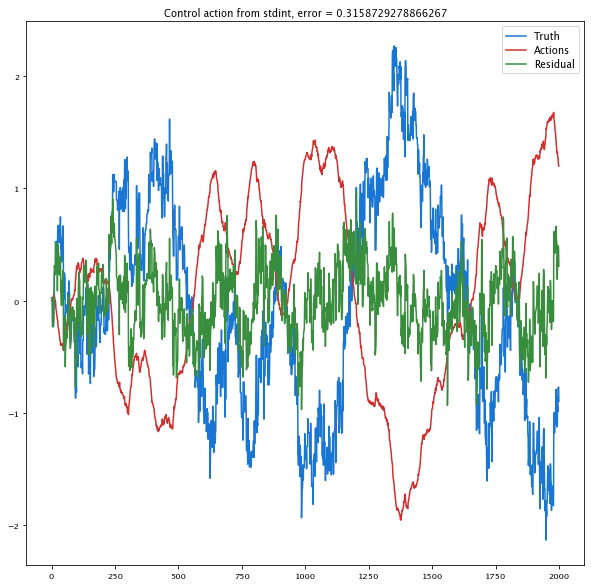

In [3]:
show_control('stdint')

Starting at timestep 4


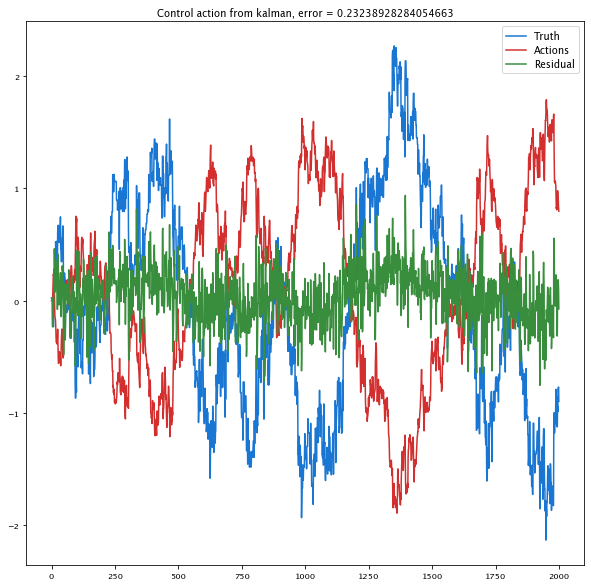

In [4]:
show_control('kalman')

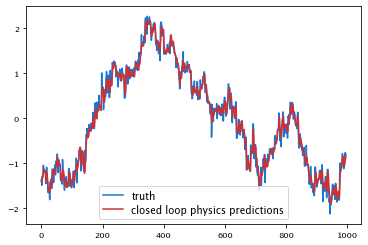

In [5]:
kalman.kfilter.state = np.flip(truth[1000:1000+N])
run, predict = kalman.kfilter.run(truth[1000+N:2000] + np.random.normal(0, 0.06, (1000-N,)), save_physics=True)
#plt.plot(run, label = 'kfilter output')
plt.plot(truth[1000+N:2000], label='truth')
plt.plot(predict, label='closed loop physics predictions')
kalman.kfilter.state = np.flip(truth[:N])
plt.legend()

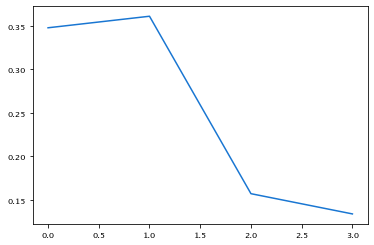

In [6]:
plt.plot(kalman.kfilter.A[0])